# NLP Project

In this project, you are expected to perform NLP on an online dataset that you will obtain from an API or scraping.

This is an open-ended project, and you can be creative!

### Requirements:
- Obtain data from an API or web-scraping. No premade datasets from Kaggle!
- You are epxected to work on some form of **text data**.
- Your goal is to uncover underlying clusters (social communities, market patters) etc., using unsupervised learning.
- You can use any method; clustering, sentiment analysis, dimensionality reduction, pretrained models, word-embeddings, network embeddings, etc.
- Create a visualization in 2d or 3d of the data with the clusters you found tagged. See reddit example below.
- Analyze the produced clusters and use them to provide a short explanation of what you found.

Reddit example visualization:

![](reddit.png)

**You don't have to do it at a large scale**

The data for these sort of projects can run very large if you let them, making the enterprise difficult.

You can limit yourself to samples of the communities you're looking at rather than the entire thing.

Please focus on exploring multiple techniques, understanding which ones would be most applicable, and interpreting the final results.

### Good Luck!

In [96]:
# Imports
# !pip install google-play-scraper
# !pip install emoji
from google_play_scraper import reviews
import pandas as pd
import emoji
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import numpy as np

## Web Scraping

In [99]:
# Scrape 10000 reviews for Instagram because more would take way too long
result, _ = reviews('com.instagram.android', lang='en', country='ca', count=10000)

In [100]:
# Save to df
df = pd.DataFrame(result)

In [101]:
# Save as CSV
df.to_csv('instagram_reviews_NPL_Project.csv', index=False)

In [102]:
df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,057e89d3-028b-48da-9eab-57b96d89bb1e,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,good,5,0,None,2025-05-19 15:04:52,None,None,None
1,09d931db-1b3f-4d66-b0e8-181331576c44,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,i can't get any new features are added,1,0,380.0.0.49.84,2025-05-19 15:04:41,None,None,380.0.0.49.84
2,45b3a43c-4ad4-40ab-be50-75b255b7798c,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,top ok,5,0,380.0.0.49.84,2025-05-19 15:04:34,None,None,380.0.0.49.84
3,ad6950ff-f95b-4e25-a801-93fb06332fc4,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Instagram in a nutshell: Not interested. Not i...,1,25,380.0.0.49.84,2025-05-19 15:04:13,None,None,380.0.0.49.84
4,0aa6bd20-89aa-45f4-ac93-47b4448c2459,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Nice,5,0,None,2025-05-19 15:03:51,None,None,None


In [103]:
df.tail()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
9995,7b430df0-8db5-4cee-a33e-aaee715752aa,Nisha,https://play-lh.googleusercontent.com/a/ACg8oc...,very nice,5,0,None,2025-05-16 06:29:50,None,None,None
9996,c66eb899-1d55-41d3-b5c3-aaa1e44f79f8,Odia toka FF gamer,https://play-lh.googleusercontent.com/a/ACg8oc...,very good and best app,5,0,379.1.0.43.80,2025-05-16 06:29:08,None,None,379.1.0.43.80
9997,781182da-aa39-4295-a7d3-a80d22840dcb,Tanay marke,https://play-lh.googleusercontent.com/a-/ALV-U...,nice,5,0,None,2025-05-16 06:28:54,None,None,None
9998,17ad418b-a1ab-4ab6-bb28-0a3b0f800093,LICI PRASANTA,https://play-lh.googleusercontent.com/a/ACg8oc...,awesome,5,0,None,2025-05-16 06:28:49,None,None,None
9999,854bf0be-8f9c-4246-a7b7-b67f7d83a1b6,Vicky Taanya,https://play-lh.googleusercontent.com/a-/ALV-U...,Entertainment,1,0,380.0.0.49.84,2025-05-16 06:28:41,None,None,380.0.0.49.84


In [104]:
df.sample(20)

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
8064,71c4d720-d238-4260-a0c1-9d01831d3373,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,very nice,5,0,None,2025-05-17 00:52:13,None,None,None
431,699a0039-c559-4d20-9561-e517a3d77873,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,"Instagram has been really helpful nowadays, it...",5,0,380.0.0.49.84,2025-05-19 12:21:25,None,None,380.0.0.49.84
8956,6f94eacb-a204-497c-b2cc-9bde1a430cf4,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,"There are lot of bugs, shutting down of Instag...",1,6,380.0.0.49.84,2025-05-16 13:41:41,None,None,380.0.0.49.84
8427,fbf6c5a6-0b6c-4cce-bb11-e53b1dc85772,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,super,5,0,323.0.0.35.65,2025-05-16 21:50:04,None,None,323.0.0.35.65
5031,6d96826f-ade8-40ab-953e-4917e3e3e486,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,best app for chatting and making videos or reels,5,0,328.0.0.42.90,2025-05-18 02:36:35,None,None,328.0.0.42.90
6443,20831534-0529-4b6f-9cde-5cdb1cac2878,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,nice,5,0,225.0.0.19.115,2025-05-17 11:58:07,None,None,225.0.0.19.115
765,452bacf8-ca55-45b4-82e1-70b111935754,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,xjfeyuee,5,0,376.1.0.55.68,2025-05-19 10:34:05,None,None,376.1.0.55.68
5786,5e34657d-e695-41d9-baa3-38e036d7097f,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,it's ok but I don't like that if you make an a...,1,0,None,2025-05-17 18:24:11,None,None,None
9297,29137787-c0c3-4341-8f62-49c8865c7f2a,Mustaki Rohaman,https://play-lh.googleusercontent.com/a/ACg8oc...,ok,5,1,380.0.0.49.84,2025-05-16 11:22:40,None,None,380.0.0.49.84
1628,f3e698ea-94a8-42b4-9c22-7bd1bdea42d1,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,to recover my disable account Dear instagram t...,2,0,264.0.0.22.106,2025-05-19 05:09:37,None,None,264.0.0.22.106


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   reviewId              10000 non-null  object        
 1   userName              10000 non-null  object        
 2   userImage             10000 non-null  object        
 3   content               10000 non-null  object        
 4   score                 10000 non-null  int64         
 5   thumbsUpCount         10000 non-null  int64         
 6   reviewCreatedVersion  7107 non-null   object        
 7   at                    10000 non-null  datetime64[ns]
 8   replyContent          0 non-null      object        
 9   repliedAt             0 non-null      object        
 10  appVersion            7107 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(8)
memory usage: 859.5+ KB


## Data Preprocessing

In [107]:
# Only keep content
df = df[['content']]

In [108]:
# Clustering
def clean_text(text):
    # Remove emojis
    text = emoji.replace_emoji(text, replace='')
    # Convert to lowercase
    return text.lower().strip()

df['cleaned_content'] = df['content'].apply(clean_text)

In [109]:
# TF-IDF Vectorization (no tokenization)
vectorizer = TfidfVectorizer(max_df=0.9, min_df=10, stop_words='english', token_pattern=r'(?u)\b[a-zA-Z][a-zA-Z]+\b')
X = vectorizer.fit_transform(df['cleaned_content'])

In [110]:
# Clustering
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X)
df['cluster'] = clusters

# Display
for cluster_num in range(k):
    print(f"\nCluster {cluster_num}:")
    cluster_samples = df[df['cluster'] == cluster_num]['content'].head(5)
    for i, review in enumerate(cluster_samples, 1):
        print(f"{i}. {review}")


Cluster 0:
1. i can't get any new features are added
2. top ok
3. Instagram in a nutshell: Not interested. Not interested. Not interested. Clearly a scam which when reported you claim doesn't violate any rules. Not interested. Stolen content from another account. Straight up misinformation. Not interested. A miserable user experience that has been deliberately created because 💵💵💵💵 Your algorithms are bad & you should feel bad.
4. 🤬
5. Excellent for me to take them lead in my digital creator journey

Cluster 1:
1. i like it its really good
2. WRONGFULLY DISABLED ACCOUNT — my account was disabled due to a violation I haven't committed. It has been 2 months already and yet META is not taking any action!!!!!
3. it's really disappointing that once you delete your avatar it's gone forever... I don't know how I lost it but now it's like punishment Recently I observed that instagram was heating my phone and draining the battery more than the games I play on my phone. I had to uninstall it and

In [111]:
# Cluster characteristics
print("\nCluster analysis:")
for cluster_num in range(k):
    cluster_reviews = df[df['cluster'] == cluster_num]['cleaned_content']
    word_counts = cluster_reviews.str.split().apply(len)
    
    print(f"\nCluster {cluster_num} stats:")
    print(f"Number of reviews: {len(cluster_reviews)}")
    print(f"Avg word count: {word_counts.mean():.1f}")
    print("Top words:")
    
    # TF-IDF features
    cluster_indices = df[df['cluster'] == cluster_num].index
    cluster_tfidf = X[cluster_indices].mean(axis=0)
    
    # Convert to array and get sorted indices
    tfidf_scores = np.array(cluster_tfidf).flatten()
    sorted_indices = np.argsort(tfidf_scores)[::-1]
    feature_names = vectorizer.get_feature_names_out()
    
    # Print top 10 words
    for i in sorted_indices[:10]:
        if tfidf_scores[i] > 0:
            print(f"- {feature_names[i]} (score: {tfidf_scores[i]:.3f})")


Cluster analysis:

Cluster 0 stats:
Number of reviews: 6412
Avg word count: 7.7
Top words:
- app (score: 0.079)
- best (score: 0.057)
- super (score: 0.033)
- love (score: 0.030)
- good (score: 0.023)
- excellent (score: 0.022)
- great (score: 0.021)
- amazing (score: 0.021)
- ok (score: 0.016)
- bad (score: 0.015)

Cluster 1 stats:
Number of reviews: 613
Avg word count: 23.6
Top words:
- like (score: 0.231)
- account (score: 0.195)
- app (score: 0.063)
- suspended (score: 0.048)
- instagram (score: 0.047)
- reason (score: 0.041)
- disabled (score: 0.036)
- don (score: 0.030)
- just (score: 0.027)
- got (score: 0.021)

Cluster 2 stats:
Number of reviews: 590
Avg word count: 10.7
Top words:
- instagram (score: 0.458)
- love (score: 0.090)
- app (score: 0.067)
- best (score: 0.056)
- good (score: 0.033)
- favourite (score: 0.026)
- like (score: 0.024)
- open (score: 0.021)
- working (score: 0.017)
- life (score: 0.016)

Cluster 3 stats:
Number of reviews: 950
Avg word count: 1.9
Top wor

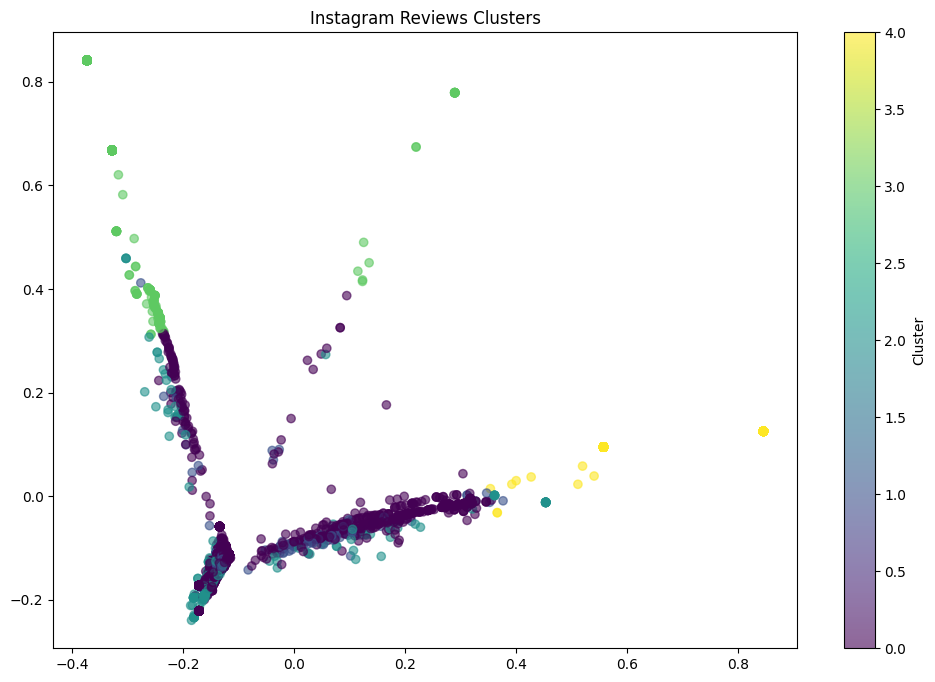

In [112]:
# Visualization
pca = PCA(n_components=2, random_state=42)
X_2d = pca.fit_transform(X.toarray())

plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_2d[:, 0], X_2d[:, 1], c=clusters, cmap='viridis', alpha=0.6)
plt.title("Instagram Reviews Clusters")
plt.colorbar(scatter, label='Cluster')

C:\Users\ladhi\AppData\Local\Temp\ipykernel_28296\782912185.py:32: UserWarning: Glyph 129324 (\N{SERIOUS FACE WITH SYMBOLS COVERING MOUTH}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\ladhi\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 129324 (\N{SERIOUS FACE WITH SYMBOLS COVERING MOUTH}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


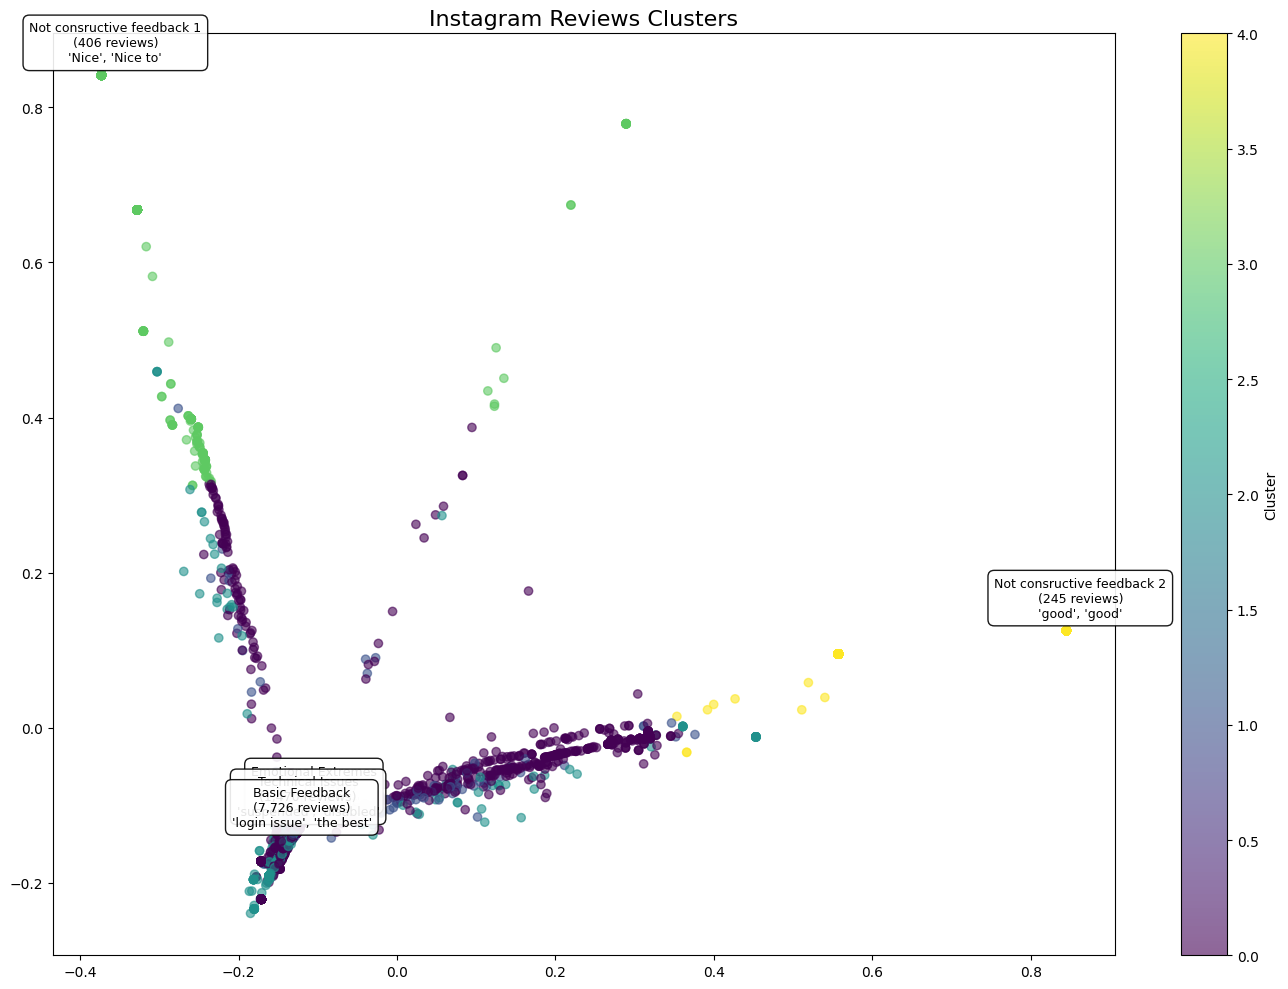

In [134]:
# Updated cluster labels based on the new interpretation
cluster_labels = {
    0: "Emotional Extremes\n(153 reviews)\n🤬 to 'Excellent'",
    1: "Technical Issues\n(1,470 reviews)\n'suspended', 'disabled'",
    2: "Basic Feedback\n(7,726 reviews)\n'login issue', 'the best'",
    3: "Not consructive feedback 1\n(406 reviews)\n'Nice', 'Nice to'",
    4: "Not consructive feedback 2\n(245 reviews)\n'good', 'good'"
}

plt.figure(figsize=(14, 10))
scatter = plt.scatter(X_2d[:, 0], X_2d[:, 1], c=clusters, cmap='viridis', alpha=0.6)
plt.title("Instagram Reviews Clusters", fontsize=16)

# Labels
for cluster_num in range(k):
    cluster_mask = (clusters == cluster_num)
    if sum(cluster_mask) > 0:
        median_x = np.median(X_2d[cluster_mask, 0])
        median_y = np.median(X_2d[cluster_mask, 1])
        
        plt.annotate(
            cluster_labels[cluster_num],
            xy=(median_x, median_y),
            xytext=(10, 10),
            textcoords='offset points',
            bbox=dict(boxstyle='round,pad=0.5', fc='white', alpha=0.9),
            fontsize=9,
            ha='center'
        )

plt.colorbar(scatter, label='Cluster')
plt.tight_layout()
plt.show()

## Interpretation

- Cluster 0 is composed of a mix of feedbacks either very negative or very positive. What groups these reviews together is the fact that the person was very expressive in the feedback about their extreme emotions.

- Cluster 1 is composed of feedbacks that talk about technical account issues.

- Cluster 2 is composed of basic constructive feedbacks on the app. What groups these reviews together is the fact that they are simple statements.

- Cluster 3 is composed of feedbacks that are composed of the word nice.

- Cluster 4 is composed of feedbacks that are composed of the word good.

Clusters 3 and 4 could be combined